In [0]:
# 
# This file contains intermediate debiased modeling work used for the 
#   2022 Machine Learning Workshop (part of the Software Symposium)!
#   https://FORWARD_SITE/mlworkshop2022 
#      OR https://INFO_SITE/cdo/events/internal-events/4354c5db-3d3d-4481-97c4-8ad8f12686f1
#
# You can (and should) change them for your own experiments, but they are uniquely defined
# here for constants that we will use together.


# Let's *Fix* "NYC Taxi 2025"!
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/640px-Kernel_Machine.svg.png' width='400px' title="ML Model Boundary" />


## Review
* In the first notebook (**01_explore_data**) we looked at NYC Taxi data and regional demographic data.
* In the second notebook (**02_predict_debiased**) we built a prediction model and confirmed bias does exist.
   * The model predicts only by NYC T&LC zones instead of daypart because that data wasn't available.
   * We identified ride disparity for the most populous zones according to ethnicity and income as targets to fix.
* In this notebook, we'll demonstrate a way to **mitigate** bias in our historical prediction model through the use
  of auxiliary databases (here demographics data).
* As a reminder, your code will default to the _'beginner'_ path.  As a testament to your _'expertness'_ you can 
  edit the configuration file (`utilities/settings.py`) to set this variable.  *(HINT: Look for EXPERIENCED_MODE)*
* [image source](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/640px-Kernel_Machine.svg.png)



In [0]:
%run ../features/location_ops

In [0]:
%run ../features/taxi_dataset

Credentials not detected, creating a new one (name 'CREDENTIALS' is not defined)...
Detected User ID: ez2685

Aborting re-definition of credentials...

In [0]:
%run ../features/modeling

In [0]:
%run ../examples/calibrated_equalized_odds

## n3.e8 Auxiliary Feature Creation
If you wanted to include features directly in your model, consider integrating data from your aux database.

We won't be using them here, but these features now have demographic factors (z-scores from zone-normalized populations) that could help a model learn how to better optimize a final decision while using additional features. 



In [0]:
df = taxi_zone_demos('ethnc_grp')   # compute column-wise z-score for a demographic factor
display(df)

zone,ethnc_grp_African_American,ethnc_grp_Asian,ethnc_grp_General_Market,ethnc_grp_Hispanic
Homecrest,-0.5943078556493984,-0.3994764194493627,1.4952440720645959,-0.5014597969658349
Corona,-0.34781559722444155,-0.586212221215715,-0.5574800046746564,1.491507823114813
Bensonhurst West,-0.8015439397125761,0.635047764400068,1.4072158053606143,-0.3007563680851631
Westerleigh,-0.6453207421785914,-0.5176715727436846,1.4868418704909772,-0.3238495555687011
Charleston/Tottenville,-0.5817549305941498,-0.5397342754438809,1.493852070841066,-0.3723628648030354
Douglaston,-0.9315922531536344,0.40877465007296776,1.2175390322820328,-0.6947214292013661
Mount Hope,0.42866421913186037,-0.7315309404135022,-0.4462614525755318,1.558068137611493
Pelham Parkway,-0.8006139742249505,-0.9184943312653299,0.7222247227121832,0.9968835827780972
East Concourse/Concourse Village,0.708753510736262,-1.0307024226619725,-0.6707392646143304,0.9926881765400409
Marble Hill,-0.15040850660626232,-0.9693090780996646,-0.28006187577713315,1.39977946048306



### Sample Weighting

An additional method for integrating features is to add specific sample weight to different samples that are perceived as a negative bias.  
* In spark-based modeling, most models [like the Random Forest](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html#pyspark.ml.classification.RandomForestClassifier) have a setting called `weightCol` that can be used to raise the importance of a sample.
* In scikit-based modeling, models include the option to add an additional weight [in the fit (train) function](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit).
* Other modeling librarires like [lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier.fit) and [XGboost](https://xgboost.readthedocs.io/en/stable/parameter.html) have similar methods.

While we don't go into the specifics, this is just one way of using an existing learning model to accomodate intention sample weighting to fight bias.  There are other methods as well that directly manipulate the feature space, but please consult the white paper and bias discussion in the main presentation for more information on these topics.

**Interactive Note**

... and hop back to the slides "Bias in Data – Post-Modeling Score Adaptation (hands-on exercise n3.e9)" to follow along.

## n3.e9 Post-modeling Corrections

In [0]:
import scipy.stats as st   # zscore norm

col_disparity_ind = 'needs_mitigation'
path_read = CREDENTIALS['paths']['demographics_aux']
list_factors = ['gnrt', 'ethnc_grp', 'gndr', 'hshld_incme_grp', 'edctn', 'marital_status_cif']

# this is fast enough to run locally, no need to save
if True:
    udf_zscore_to_percent = F.udf(lambda x: float(st.norm.cdf(x)))  # method to go out of zscore
    df_demos_aux = None
    for factor_active in list_factors:
        df_demos_aux_local = (spark.read.format('delta').load(CREDENTIALS['paths']['demographics_disparity_base'])
            .filter(F.col('factor') == F.lit(factor_active))  # filter for specific zone
            .groupBy('zone').agg(
                F.min('overall_quantile').alias('overall_quantile'),   # retain quantile scores
                F.max('cnt_zscore').alias('zscore_max'),   # this will tell us how much to weight the sample
            )
            .withColumn(col_disparity_ind, F.when(F.col('overall_quantile')==F.lit(1), F.lit(1)).otherwise(F.lit(0)))
            .fillna({'zscore_max':-9999})  # force score to zero
            .withColumn('z_percent', udf_zscore_to_percent(F.col('zscore_max')) )   # convert zscore -> [0, 1]
            .withColumn('sample_weight', F.lit(0.5) + (F.col(col_disparity_ind)*F.col('z_percent')) )   # weight is [0.5 - percent/2]
            .drop('zscore_max')
            .withColumn('factor', F.lit(factor_active))  # restore factor
        )
        if df_demos_aux is None:  # loop to repeat
            df_demos_aux = df_demos_aux_local
        else:
            df_demos_aux = df_demos_aux.union(df_demos_aux_local)

display(df_demos_aux)

zone,overall_quantile,needs_mitigation,z_percent,sample_weight,factor
Homecrest,1,1,0.900693433398783,1.400693433398783,gnrt
Corona,2,0,0.8658281775558692,0.5,gnrt
Bensonhurst West,1,1,0.8729261049500217,1.3729261049500217,gnrt
Westerleigh,2,0,0.8373644445691883,0.5,gnrt
Douglaston,1,1,0.9204086208240401,1.42040862082404,gnrt
Charleston/Tottenville,2,0,0.871225968938024,0.5,gnrt
Pelham Parkway,2,0,0.8560658249381914,0.5,gnrt
East Concourse/Concourse Village,2,0,0.8457609089390918,0.5,gnrt
Mount Hope,3,0,0.8197940545030451,0.5,gnrt
Marble Hill,2,0,0.8444889849821023,0.5,gnrt


### Clean model tuning with a validation dataset
We're training a post-model correction from the [AIF360](https://github.com/Trusted-AI/AIF360) library by IBM.  For a single binary model at a time, it will try to make sure there is equal fairness between majority and non-majority classes.

* **tune on validation** - In training this second model, we can't cheat with training data we've already used, so be sure to use validation only.
* **measure on test** - We can provide a fair reference for test data though and we'll reuse the larger test set to get our performance numbers.

The block below evaluates with our original test model and trains a new adaptation model, which is also saved in mlflow --- cool, in' nit?

[model_lookup]: Retrieved 2 prior matches.
[model_lookup]: Retrieved valid model, run: b711ad253845401f81df0998fd46969e, url: runs:/b711ad253845401f81df0998fd46969e/mitigate_ethnc_grp
[Factor: ethnc_grp] {'accuracy': 0.6699806279469279, 'auc': 0.7221764420741932, 'factor': 'ethnc_grp'}
=======================================
[model_lookup]: Retrieved 1 prior matches.
[model_lookup]: Retrieved valid model, run: 10805151d83a46479a1dbcdae547cecd, url: runs:/10805151d83a46479a1dbcdae547cecd/mitigate_hshld_incme_grp
[Factor: hshld_incme_grp] {'accuracy': 0.6613081797257749, 'auc': 0.7115107540872654, 'factor': 'hshld_incme_grp'}
=======================================
[model_lookup]: Retrieved 1 prior matches.
[model_lookup]: Retrieved valid model, run: cdf3fbe29ab24fb0976dde5edfe0122a, url: runs:/cdf3fbe29ab24fb0976dde5edfe0122a/mitigate_edctn
[Factor: edctn] {'accuracy': 0.6153555454562705, 'auc': 0.5001888975831179, 'factor': 'edctn'}
=======================================
[model_lookup]: Retrieved 1 prior matches.
[model_lookup]: Retrieved valid model, run: 2d5315f9868f473395196b2c11f42187, url: runs:/2d5315f9868f473395196b2c11f42187/taxi_popular
[Factor: _base] {'accuracy': 0.7017144962781984, 'auc': 0.7409480667065728, 'factor': '_base'}
=======================================
Out[65]:

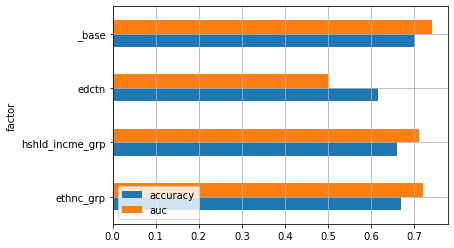

<matplotlib.legend.Legend at 0x7f16f2f54370>

In [0]:
col_label = 'is_top'
col_protected = 'needs_mitigation'
col_predicted = 'is_top_probability'
col_no_predict = 'not_top_probability'
list_factors_adapt = ['ethnc_grp', 'hshld_incme_grp', 'edctn']

# this predict + train takes about 8-10 minutes per model, so don't run it in workshop
if CREDENTIALS['constants']['EXPERIENCED_MODE'] and CREDENTIALS['constants']['WORKSHOP_ADMIN_MODE']:
    for factor_active in list_factors_adapt:
        dt_training = dt.datetime.now()

        # generate predictions for validation set
        df_validation = (spark.read.format('delta').load(CREDENTIALS['paths']['nyctaxi_geo_labeled']) 
            .filter(F.col('dataset')==F.lit('validate'))
        )
        df_test = (spark.read.format('delta').load(CREDENTIALS['paths']['nyctaxi_geo_labeled']) 
            .filter(F.col('dataset')==F.lit('test'))
        )

        # we need disparity feature, so include it here... 
        df_validation = model_predict_subsample(df_validation, df_demos_aux, factor_active,
                                                   0.20 if CREDENTIALS['constants']['EXPERIENCED_MODE'] else None)
        # basic predict using our model from 02 notebook (if you don't need labels)
        # df_source_pred = model_predict(df_validation, "taxi_popular")

        # predict on test set, too, for comparable metrics
        df_test = model_predict_subsample(df_test, df_demos_aux, factor_active, 1.0)

        # convert them to pandas
        pdf_validation = df_validation.toPandas()
        pdf_test = df_test.toPandas()
        fn_log(f"Predict for {len(pdf_validation)} validation and {len(pdf_test)} test samples... (time: {dt.datetime.now() - dt_training} )")

        # create the prediction inputs needed for equalized odds class
        pdf_validation[col_no_predict] = 1 - pdf_validation[col_predicted]
        pdf_validation = pdf_validation.set_index(col_protected)
        pdf_test[col_no_predict] = 1 - pdf_test[col_predicted]
        pdf_test = pdf_test.set_index(col_protected)

        #     par_gap = statistical_parity_difference(pdf_valid_pred['is_top'], pdf_valid_pred['is_top_predict'], 
        #                                             prot_attr=col_disparity_type, priv_group=class_privilaged, pos_label=1)
        
        # from aif360.sklearn.postprocessing import CalibratedEqualizedOdds
        pp = CalibratedEqualizedOdds(col_protected, cost_constraint='weighted', random_state=42)

        # execute model training and save it!
        dt_training = dt.datetime.now()
        name_model = f"mitigate_{factor_active}"
        run_name, _ = modeling_train(pdf_validation, pdf_test, col_label, name_model, 
                                     pp, list_inputs=[col_no_predict, col_predicted], dict_param_extra={},
                                     name_experiment=CREDENTIALS['constants']['EXPERIMENT_NAME'],
                                     model_type='sklearn')
        fn_log(f"Wrote model {run_name} (time: {dt.datetime.now() - dt_training})")

# print some information about the models
model_metrics = []
for factor_active in list_factors_adapt + ['_base']:
    name_model = f"mitigate_{factor_active}"
    if factor_active == '_base':
        name_model = "taxi_popular"
    # retrieve model, prepare data to print
    _, model_meta = model_lookup(name_model, verbose=False)
    obj_metric = {x.replace('metrics.', ''):float(model_meta[x])
                  for x in list(model_meta.keys()) if x.startswith('metrics.') and 'samples' not in x}
    obj_metric['factor'] = factor_active
    fn_log(f"[Factor: {factor_active}] {obj_metric}")
    # refactor a little so we can plot it
    model_metrics.append(obj_metric)
    fn_log(f"=======================================")

# transform into dataframe for a quick plot
ax = pd.DataFrame(model_metrics).set_index('factor').plot.barh()
ax.grid()
ax.legend(loc='lower left')

**Interactive Note**

... and hop back to the slides "Bias in Data – Detailed Focus on Changes (hands-on exercise n3.e10)" to follow along.

### Adjusted Debiased Predictions (for now, binary)
We've trained different models for a subset of important demographic factors and except for the `edctn` (education) model, we see marginal loss of performance versus the `_base` model from notebook 2.

Now, to bring it home, we'll reapply the 
learning and prediction model to see if we were able to mitigate some of the effected areas.  The utility in this area
is showing that we can use pre-trained models to evaluate on new data.  However, it should be noted that the classifier we
used still requires the aux data indicating that a bias was found in a zone (e.g. the `mitigation_needed` column).

Below, we run the predictions off line and store them for speed.

In [0]:
# let's write our predictions in aggregate for the interactive viewer 

# this loop took about 15m on full test dataset (~5m demographic), so skipping to viz only
if CREDENTIALS['constants']['EXPERIENCED_MODE'] and CREDENTIALS['constants']['WORKSHOP_ADMIN_MODE']:
    for factor_active in list_factors_adapt:
        path_read = CREDENTIALS['paths'][f'nyctaxi_debias_{factor_active}']
        fn_log("Running adptation prediction for factor {factor_active}...")
        # reload test data + run prediction
        df_test = (
            model_predict_subsample(
                spark.read.format('delta').load(CREDENTIALS['paths']['nyctaxi_geo_labeled']) 
                .filter(F.col('dataset')==F.lit('test'))
                , df_demos_aux, factor_active, 1.0)
            #model_predict(spark.read.format('delta').load(CREDENTIALS['paths']['nyctaxi_geo_labeled']) 
            #              .filter(F.col('dataset')==F.lit('test'))
            #              , "taxi_popular")
            .withColumn(col_no_predict, F.lit(1) - F.col(col_predicted))
        )

        # now let's actually load and execute the model on our TEST data
        name_model = f"mitigate_{factor_active}"    
        df_predict = (
            model_adapt(df_test, name_model, list_col_predict=[col_no_predict, col_predicted], 
                        list_col_index=['needs_mitigation'])
            .withColumn('is_top_predict', F.col('adapted_predict'))
            .withColumnRenamed('zone', 'pickup_zone')
        )
        # also write predicted, aggregated stats by the zone
        df_zone_predict = taxi_postproc_volumes(df_predict)
        # clobber historical file, rewrite
        dbutils.fs.rm(path_read, True)
        df_zone_predict.write.format('delta').save(path_read)


## n3.e10 Detailed Focus on Changes
Now we plot the disparity differences side by side to see the impacts of this final modeling step.

This is also another chance for you to jump into the `10_interactive_demos` notebook for more interactive/self analysis
of the impact on demographics.

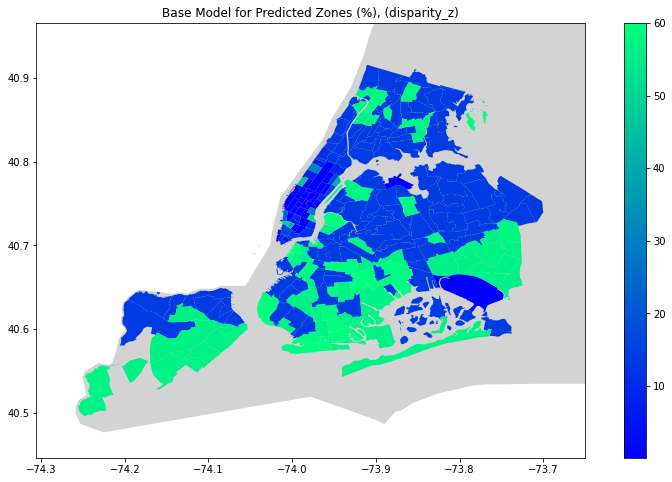

In [0]:
## NOTE: For parity, this is a copy of the code at the end of notebook 2 in the "Disparity Check" section
# reload the TOP disparity zones from notebook one
df_demo_disparity = (spark.read.format('delta').load(CREDENTIALS['paths']['demographics_disparity_base'])
    .groupBy('zone', 'factor').agg(    # group to set zones we don't care about to zero
        F.min(F.col('overall_quantile')).alias('quantile'),
        F.max(F.when(F.col('overall_quantile')==F.lit(1), F.col('cnt_zscore')).otherwise(F.lit(0))).alias('cnt_zscore'),
    )
)
# load geometry for NEW YORK state; convert to geometry presentation format
pdf_shape_states = (spark.read.format('delta').load(CREDENTIALS['paths']['geometry_state'])
    .filter(F.col('stusps')==F.lit('NY'))
    .toPandas()
)
pdf_shape_states['geometry'] = pdf_shape_states['geometry'].apply(lambda x: wkt.loads(x))

# loop to viz against baseline
list_viz = [["Ethnic Debiasing", f'nyctaxi_debias_ethnc_grp'], ["Base Model", f'nyctaxi_h3_learn_base']]
for (graph_name, data_path) in list_viz:
    path_read = CREDENTIALS['paths'][data_path]
    df_zone_predict = spark.read.format('delta').load(path_read)

    # note that there is some column renaming to perform first...
    row_stat_rides = df_zone_predict.select(F.mean('volume').alias('mean'), F.stddev('volume').alias('std')).collect()[0]
    pdf_zone_disparity = (spark.read.format('delta').load(path_read)
        .withColumnRenamed('pickup_zone', 'zone')
        .withColumn("rides_z", (F.col('volume') - F.lit(row_stat_rides['mean']))/F.lit(row_stat_rides['std']))
        .withColumnRenamed('volume', 'rides')
        .select('zone', 'rides', 'rides_z')   # get simple rides, zones, rides_z
        .join(df_demo_disparity, ['zone'])   # join with demos
        .join(spark.read.format('delta').load(CREDENTIALS['paths']['geometry_nyctaxi'])  # add shape data
              .select('zone', 'the_geom'), ['zone'])
        .withColumnRenamed('the_geom', 'geometry')
        .toPandas()
    )
    # NOTE: This isn't an actual volume disparity because demographics are normalized by zone
    #       and ride volumes are normalized across the entire system.
    pdf_zone_disparity['disparity_z'] = delta_zscore_pandas(    # safer diff compute in z-domain
        pdf_zone_disparity['cnt_zscore'], pdf_zone_disparity['rides_z'])

    # load geometry for plotting
    pdf_zone_disparity['geometry'] = pdf_zone_disparity['geometry'].apply(lambda x: wkt.loads(x))

    # plot the new zone + disparity
    shape_plot_map(pdf_zone_disparity[pdf_zone_disparity['factor']=='ethnc_grp'], 
                   col_viz='disparity_z', gdf_background=pdf_shape_states, zscore=True,
                   txt_title=f"{graph_name} for Predicted Zones (%)")


### Hey, nothing changed!
Don't worry, your eyes aren't deceiving you....
1. The majority of predicted zones had no little or no impact
2. The significant changes across the zones are mostly **decreased** effects (e.g. deeper blue/near zero) changes.
3. (A subtlety) The modified model here is just built to debias ethnic differences, not income or others.

Luckily, that means the debias worked at a macro-level (aka the devil's in the details)
* We built a model to closely align to our historical predictions and we've configured our debiasing to try to maintain equality across both the rate of bias improvement and the overall performance rate.  
* If there are questions about model performance, we can re-verify by looking back to the section "Clean model tuning"

To demonstrate, let's take a focused look at only the zones **most effected** by the debiasing activiy.

Out[69]:

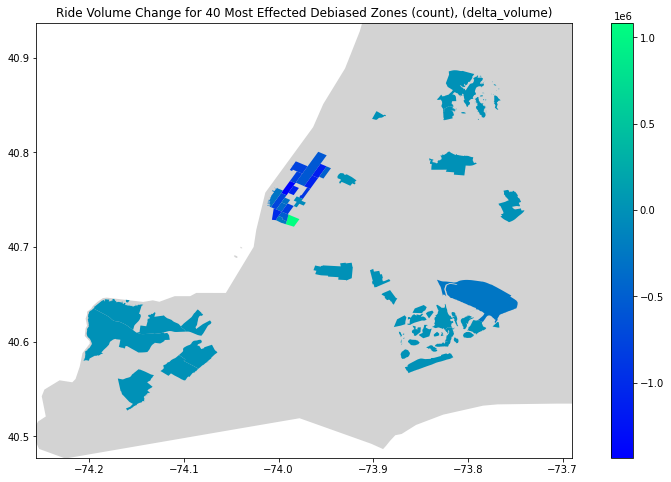

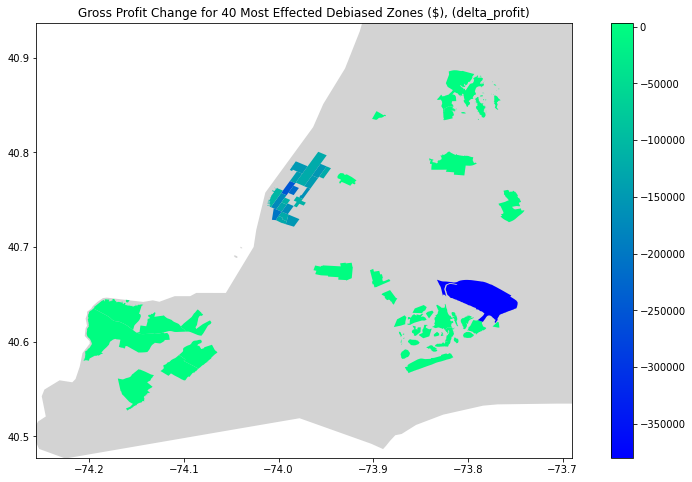

(<Figure size 1008x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Gross Profit Change for 40 Most Effected Debiased Zones ($), (delta_profit)'}>)

In [0]:
# compute the gains by volume and profit wihtin model
df_debias = (spark.read.format('delta').load(CREDENTIALS['paths'][f'nyctaxi_debias_ethnc_grp'])
    .withColumn('delta_volume', F.col('volume_top') - F.col('volume'))
    .withColumn('delta_abs_volume', F.abs(F.col('delta_volume')))
    .withColumn('delta_profit', F.col('sum_top') - F.col('sum'))
    .withColumn('delta_abs_profit', F.abs(F.col('delta_profit')))
    .withColumnRenamed('pickup_zone', 'zone')
)

# how many "most effected" zones (for more and fewer rides) shall we plot?
num_extreme = 20

pdf_profit = (
    df_debias.orderBy(F.col('delta_profit').desc()).limit(num_extreme)
    .union(df_debias.orderBy(F.col('delta_profit').asc()).limit(num_extreme))
    .join(spark.read.format('delta').load(CREDENTIALS['paths']['geometry_nyctaxi'])  # add shape data
          .select('zone', 'the_geom'), ['zone'])
    .withColumnRenamed('the_geom', 'geometry')
    .toPandas()
)
pdf_profit['geometry'] = pdf_profit['geometry'].apply(lambda x: wkt.loads(x))

pdf_volume = (
    df_debias.orderBy(F.col('delta_volume').desc()).limit(num_extreme)
    .union(df_debias.orderBy(F.col('delta_volume').asc()).limit(num_extreme))
    .join(spark.read.format('delta').load(CREDENTIALS['paths']['geometry_nyctaxi'])  # add shape data
          .select('zone', 'the_geom'), ['zone'])
    .withColumnRenamed('the_geom', 'geometry')
    .toPandas()
)
# load geometry for plotting
pdf_volume['geometry'] = pdf_volume['geometry'].apply(lambda x: wkt.loads(x))

# load geometry for NEW YORK state; convert to geometry presentation format
pdf_shape_states = (spark.read.format('delta').load(CREDENTIALS['paths']['geometry_state'])
    .filter(F.col('stusps')==F.lit('NY'))
    .toPandas()
)
pdf_shape_states['geometry'] = pdf_shape_states['geometry'].apply(lambda x: wkt.loads(x))

# plot the new zone + disparity
shape_plot_map(pdf_profit, 
               col_viz='delta_volume', gdf_background=pdf_shape_states, zscore=False,
               txt_title=f"Ride Volume Change for {num_extreme*2} Most Effected Debiased Zones (count)")
shape_plot_map(pdf_profit, 
               col_viz='delta_profit', gdf_background=pdf_shape_states, zscore=False,
               txt_title=f"Gross Profit Change for {num_extreme*2} Most Effected Debiased Zones ($)")


### Nuanced Improvements
So, it looks like the debiased model did effect some zones.
* Very high volume areas in Manhattan (to a large extent) realized a decrease in volume
* JFK airport (to a lesser extent) realized a decrease in volume
* Various sub-zones in all boroughs received some minor increases

So, **Mission Accomplished**? Maybe!

The last lesson bias mitigation is circling back to your stakeholder to make sure they are satisfied with the changes and offer alternatives for other solutions.


# Wrap-up
That's it for this notebook and learning model debiasing, what did we learn?

* Debiasing models and data is not trivial, but there are common places to look: proxy variables, egregious oversights, protected classes, etc. 
* We trained a model to adapt the output of our prior historical prediction model.
* For the technically curious, we used the built-in model tracking utility (mlflow) to largely save and restore our models for future use.  For those newer to the process, this methodical tracking may take a few more function calls, but it will prevent a lot of headaches!

If you still want more, head over to the interactive notebook **10_interactive_demos** to explore impacts of our various models or start to populate the BYO skeleton in **90_byo_experiment**.  
